## Observations and Insights

### Observations and inferences that can be made from the data:
#####   1. There is a strong positive correlation between mouse weight and tumor volume. As the mouse weight increases, the tumor volume, on average, also increases.
#####   2. The fact that there is a positive correlation between mouse weight and tumor volume means there were two variables that could affect tumor size- weight and drug regimen. This means the results of this study can be skewed.
#####   3. Ramicane	had the lowest final average tumor volume volume (36.19 mm3), with Capomulin a close second (36.67 mm3). Both of these drugs also had the two greatest sample sizes. Capomulin had the most amount of samples (230), and Ramicane had the second most (228). 
#####   4. Because Ramicane and Capomulin both have the lowest final average tumor volumes and the greatest sample sizes, they are the two most promising drug regimens.
#####   5. Almost every drug regimen had a different sample size. The difference between the greatest sample size (Capomulin) and the smallest (Propriva) was 69 data points. 

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# group by drug regimen
grouped = combined_df.groupby(["Drug Regimen"])
# find the mean tumor volume of each drug
tumor_mean = grouped["Tumor Volume (mm3)"].mean()
# find the median tumor volume of each drug
tumor_median = grouped["Tumor Volume (mm3)"].median()
# find the variance of tumor volume of each drug
tumor_variance = grouped["Tumor Volume (mm3)"].var()
# find the standard deviation of tumor volume
tumor_std = grouped["Tumor Volume (mm3)"].std()
# find the SEM of tumor volume of each drug
tumor_sem = grouped["Tumor Volume (mm3)"].sem()

# place all data above into a data frame
summary_statistics_df = pd.DataFrame({"Tumor Volume (mm3) Mean": tumor_mean,
                                     "Tumor Volume (mm3) Median": tumor_median,
                                     "Tumor Volume (mm3) Variance": tumor_variance,
                                     "Tumor Volume (mm3) Standard Deviation": tumor_std,
                                     "Tumor Volume (mm3) SEM": tumor_sem})
summary_statistics_df


,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [39]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# group by drug regimen
grouped_drug = combined_df.groupby(["Drug Regimen"])
# count how many data points there are for each drug
treatment_count = grouped_drug["Mouse ID"].count()
treatment_count


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of Data Points')

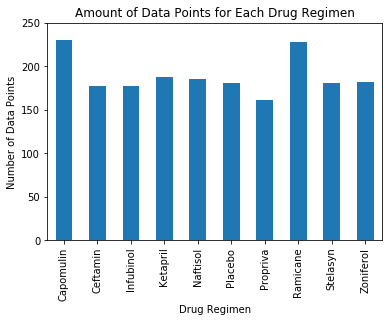

In [38]:
# plots bar graph of above data
treatment_bar = treatment_count.plot(kind="bar", title="Amount of Data Points for Each Drug Regimen", xlim=(-1,10),  ylim=(0,250))
# sets y-axis label
treatment_bar.set_ylabel("Number of Data Points")

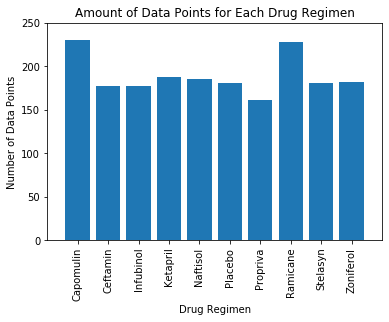

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# plot bar graph of data is previous cell
plt.bar(treatment_count.index, treatment_count)
# makes x-ticks vertical
plt.xticks(rotation=90)
# sets range for x-axis
plt.xlim(-1, 10)
# sets range for y-axis
plt.ylim(0, 250)
# sets label for x-axis
plt.xlabel("Drug Regimen")
# sets label for y-axis
plt.ylabel("Number of Data Points")
# sets title
plt.title("Amount of Data Points for Each Drug Regimen")
plt.show()


## Pie plots

Text(0, 0.5, '')

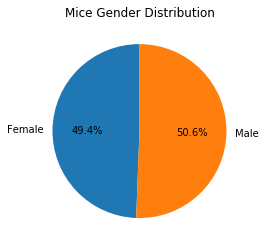

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# group data by gender
grouped_gender = combined_df.groupby(["Sex"])
# counts how many of each gender is present
gender_count = grouped_gender["Mouse ID"].count()

# plots pie chart of above data
gender_pie = gender_count.plot(kind="pie", title="Mice Gender Distribution", autopct="%1.1f%%", startangle=90)
# sets y-axis label
gender_pie.set_ylabel("")


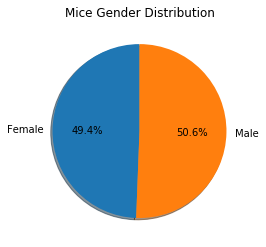

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# plots pie chart of data in previous cell
plt.pie(gender_count, labels=gender_count.index,autopct="%1.1f%%", shadow=True, startangle=90)
# sets title
plt.title("Mice Gender Distribution")
plt.show()


## Quartiles, outliers and boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# groups by mouse ID
mouse_grouped = combined_df.groupby("Mouse ID")
# takes only the final timepoints for each mouse
timepoint = mouse_grouped["Timepoint"].max()
# turns the timepoint series into a dataframe and resets the index so timepoint is a column
timepoint_df = timepoint.to_frame().reset_index()
# merges the timepoint df with the original df
merge_df = pd.merge(timepoint_df, combined_df, on=["Mouse ID", "Timepoint"], how = "inner")

# groups data by drug and finds the mean
final_tumor_sorted = merge_df.groupby("Drug Regimen").mean()

final_tumor_sorted
# based on that data frame object, the 4 best drugs are Ramicane, Capomulin, Ceftamin, & Infubinol (they have the lowest average tumor volume)




,Timepoint,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,41.000000,14.040,20.120,36.667568,1.280000
Ceftamin,30.600000,12.800,27.400,57.753977,1.720000
Infubinol,30.600000,16.400,27.320,58.178246,1.600000
Ketapril,32.600000,14.720,28.080,62.806191,1.920000
Naftisol,32.200000,12.240,27.240,61.205757,2.000000
Placebo,31.200000,10.680,28.040,60.508414,2.080000
Propriva,26.200000,9.880,27.240,56.736964,1.560000
Ramicane,40.600000,10.840,20.000,36.191390,1.200000
Stelasyn,32.708333,13.125,27.875,61.001707,1.458333


In [35]:
# sets index as the drug regimen
cleaned_df = merge_df.set_index(["Drug Regimen"])
cleaned_df

# finds only data for Ramicane
ramicane_df = cleaned_df.loc["Ramicane", :]
# takes only the tumor volume column
ramicane_tumor_final = ramicane_df["Tumor Volume (mm3)"]

# separates ramicane data into 4 quartiles
quartiles_ram = ramicane_tumor_final.quantile([.25,.5,.75])
# finds the lower quartile
lowerq_ram = quartiles_ram[0.25]
# finds the upper quartile
upperq_ram = quartiles_ram[0.75]
# finds the interquartile range
iqr_ram = upperq_ram - lowerq_ram
# find the lower outlier bound
lower_bound_ram = lowerq_ram - (1.5 * iqr_ram)
# find the upper outlier bound
upper_bound_ram = upperq_ram + (1.5 * iqr_ram)

# prints out all the data found above, plus the max and min of the data set, to look for any outliers
print("Final Tumor Max for Ramicane: " + str(ramicane_tumor_final.max()))
print("Final Tumor Min for Ramicane: " + str(ramicane_tumor_final.min()))
print("Upper Outlier Boundary for Ramicane: " + str(upper_bound_ram))
print("Lower Outlier Boundary for Ramicane: " + str(lower_bound_ram))
print("No outliers present in this data set!")

# if any outliers are prsent, this will display them in a dataframe
outlier_ram_df = ramicane_df.loc[(ramicane_tumor_final > upper_bound_ram) | (ramicane_tumor_final < lower_bound_ram), :]
outlier_ram_df


Final Tumor Max for Ramicane: 45.22086888
Final Tumor Min for Ramicane: 22.05012627
Upper Outlier Boundary for Ramicane: 54.30681135
Lower Outlier Boundary for Ramicane: 17.912664470000003
No outliers present in this data set!


,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,


In [32]:
# same process as Ramicane, but for Capomulin
capomulin_df = cleaned_df.loc["Capomulin", :]
capomulin_tumor_final = capomulin_df["Tumor Volume (mm3)"]

# same process as Ramicane, but for Capomulin
quartiles_cap = capomulin_tumor_final.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap - lowerq_cap
lower_bound_cap = lowerq_cap - (1.5 * iqr_cap)
upper_bound_cap = upperq_cap + (1.5 * iqr_cap)

print("Final Tumor Max for Capomulin: " + str(capomulin_tumor_final.max()))
print("Final Tumor Min for Capomulin: " + str(capomulin_tumor_final.min()))
print("Upper Outlier Boundary for Capomulin: " + str(upper_bound_cap))
print("Lower Outlier Boundary for Capomulin: " + str(lower_bound_cap))
print("No outliers present in this data set!")

outlier_cap_df = capomulin_df.loc[(capomulin_tumor_final > upper_bound_cap) | (capomulin_tumor_final < lower_bound_cap), :]
outlier_cap_df


Final Tumor Max for Capomulin: 47.68596303
Final Tumor Min for Capomulin: 23.34359787
Upper Outlier Boundary for Capomulin: 51.83201549
Lower Outlier Boundary for Capomulin: 20.70456164999999
No outliers present in this data set!


,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,


In [33]:
# same process as Ramicane, but for Ceftamin
ceftamin_df = cleaned_df.loc["Ceftamin", :]
ceftamin_tumor_final = ceftamin_df["Tumor Volume (mm3)"]

# same process as Ramicane, but for Ceftamin
quartiles_cef = ceftamin_tumor_final.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef - lowerq_cef
lower_bound_cef = lowerq_cef - (1.5 * iqr_cef)
upper_bound_cef = upperq_cef + (1.5 * iqr_cef)

print("Final Tumor Max for Ceftamin: " + str(ceftamin_tumor_final.max()))
print("Final Tumor Min for Ceftamin: " + str(ceftamin_tumor_final.min()))
print("Upper Outlier Boundary for Ceftamin: " + str(upper_bound_cef))
print("Lower Outlier Boundary for Ceftamin: " + str(lower_bound_cef))
print("No outliers present in this data set!")

outlier_cef_df = ceftamin_df.loc[(ceftamin_tumor_final > upper_bound_cef) | (ceftamin_tumor_final < lower_bound_cef), :]
outlier_cef_df


Final Tumor Max for Ceftamin: 68.92318457
Final Tumor Min for Ceftamin: 45.0
Upper Outlier Boundary for Ceftamin: 87.66645829999999
Lower Outlier Boundary for Ceftamin: 25.355449580000002
No outliers present in this data set!


,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,


In [34]:
# same process as Ramicane, but for Infubinol
infubinol_df = cleaned_df.loc["Infubinol", :]
infubinol_tumor_final = infubinol_df["Tumor Volume (mm3)"]

# same process as Ramicane, but for Infubinol
quartiles_inf = infubinol_tumor_final.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf - lowerq_inf
lower_bound_inf = lowerq_inf - (1.5 * iqr_inf)
upper_bound_inf = upperq_inf + (1.5 * iqr_inf)

print("Final Tumor Max for Infubinol: " + str(infubinol_tumor_final.max()))
print("Final Tumor Min for Infubinol: " + str(infubinol_tumor_final.min()))
print("Upper Outlier Boundary for Infubinol: " + str(upper_bound_inf))
print("Lower Outlier Boundary for Infubinol: " + str(lower_bound_inf))
print("One outlier present- see dataframe below.")

outlier_inf_df = infubinol_df.loc[(infubinol_tumor_final > upper_bound_inf) | (infubinol_tumor_final < lower_bound_inf), :]
outlier_inf_df


Final Tumor Max for Infubinol: 72.2267309
Final Tumor Min for Infubinol: 36.321345799999996
Upper Outlier Boundary for Infubinol: 82.74144559000001
Lower Outlier Boundary for Infubinol: 36.83290494999999
One outlier present- see dataframe below.


,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,c326,5,Female,18,25,36.321346,0


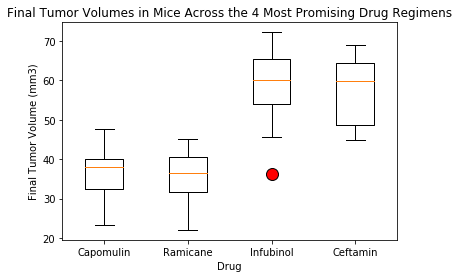

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=12, linestyle='none')

fig, ax = plt.subplots()
# plots box plot of data from previous cell
ax.boxplot([capomulin_tumor_final, ramicane_tumor_final, infubinol_tumor_final, ceftamin_tumor_final], flierprops=flierprops)
# sets x-tick values
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
# sets title
ax.set_title('Final Tumor Volumes in Mice Across the 4 Most Promising Drug Regimens')
# sets x-axis label
ax.set_xlabel('Drug')
# sets y-axis label
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and scatter plots

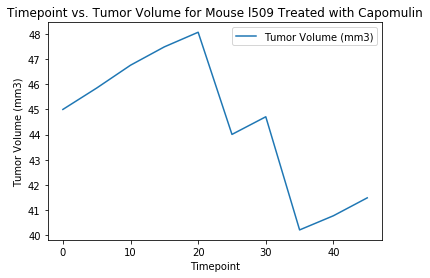

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
drug = "Capomulin"
mouse = "l509"

# sets index to drug regimen and mouse id
cleaned_df = combined_df.set_index(["Drug Regimen", "Mouse ID"])

# finds data only with with Capomulin and mouse 1509
one_drug = cleaned_df.loc[drug, mouse, :]

# takes only the timepoint and tumor volume columns
one_drug = one_drug[["Timepoint", "Tumor Volume (mm3)"]]

# sets index to timepoint
one_drug = one_drug.set_index("Timepoint")

# takes the column names
tumor_vol = one_drug.keys()

# plot line graph with above data
drug_plot = one_drug.plot(y=tumor_vol[0], title="Timepoint vs. Tumor Volume for Mouse " + mouse + " Treated with Capomulin")
# sets y axis label
drug_plot.set_ylabel("Tumor Volume (mm3)")
plt.show()


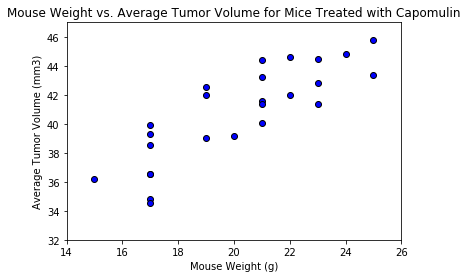

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# sets index to drug regimen
cleaned_df2 = combined_df.set_index(["Drug Regimen"])

drug = "Capomulin"

# finds data only with with Capomulin
one_drug2 = cleaned_df2.loc[drug, :]

# groups by mouse id and finds the mean of each column
mouseid_means = one_drug2.groupby("Mouse ID").mean()

# stores the values of the average tumor volumes
avg_tumor_vol = mouseid_means["Tumor Volume (mm3)"]

# stores the values of the average weight of each mouse (because their weight doesn't change, the average is the same thing)
weights = mouseid_means["Weight (g)"]

# plots scatter plot of above data
plt.scatter(weights, avg_tumor_vol, marker="o", facecolors="blue", edgecolors="black")
# sets title
plt.title("Mouse Weight vs. Average Tumor Volume for Mice Treated with Capomulin")
# sets x-axis label
plt.xlabel("Mouse Weight (g)")
# sets y-axis label
plt.ylabel("Average Tumor Volume (mm3)")
# sets range for x-axis
plt.xlim(14,26)
# sets range for y-axis
plt.ylim(32,47)
plt.show()


The correlation coefficient/r-squared value is: 0.7088568047708717


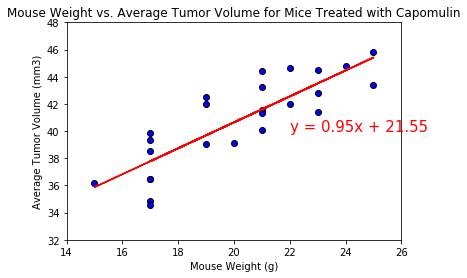

In [29]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# stores values in variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, avg_tumor_vol)
#stores regression line
regress_values = weights * slope + intercept
# creates the formula of the line that will appear
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plots points
plt.scatter(weights, avg_tumor_vol, marker="o", facecolors="blue", edgecolors="black")
# plots regression line
plt.plot(weights,regress_values,"r-")
# makes the formula appear
plt.annotate(line_eq,(22,40),fontsize=15,color="red")
# prints the formula of the line
print(f"The correlation coefficient/r-squared value is: {rvalue**2}")
# sets the title
plt.title("Mouse Weight vs. Average Tumor Volume for Mice Treated with Capomulin")
# sets x-axis label
plt.xlabel("Mouse Weight (g)")
# sets y-axis label
plt.ylabel("Average Tumor Volume (mm3)")
# sets range for x-axis
plt.xlim(14,26)
# sets range for y-axis
plt.ylim(32,48)
plt.show()
